# Import

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import statistics
from scipy import signal
from scipy.optimize import curve_fit
from cycler import cycler

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
#%matplotlib notebook

# Data structure

In [3]:
simulations = [{'eps' : 0.0, 'N': 64, 'm' : 0.0, 'folder' : "e00/N64/m0/", 'max_iter' : 50},
               {'eps' : 0.0, 'N': 64, 'm' : 2.0, 'folder' : "e00/N64/m2/", 'max_iter' : 50},
               {'eps' : 0.0, 'N': 64, 'm' : 5.0, 'folder' : "e00/N64/m5/", 'max_iter' : 50},
               {'eps' : 0.0, 'N': 64, 'm' : 10.0, 'folder' : "e00/N64/m10/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 128, 'm' : 0.0, 'folder' : "e00/N128/m0/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 128, 'm' : 2.0, 'folder' : "e00/N128/m2/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 128, 'm' : 5.0, 'folder' : "e00/N128/m5/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 128, 'm' : 10.0, 'folder' : "e00/N128/m10/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 256, 'm' : 0.0, 'folder' : "e00/N256/m0/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 256, 'm' : 2.0, 'folder' : "e00/N256/m2/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 256, 'm' : 5.0, 'folder' : "e00/N256/m5/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 256, 'm' : 10.0, 'folder' : "e00/N256/m10/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 384, 'm' : 0.0, 'folder' : "e00/N384/m0/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 384, 'm' : 2.0, 'folder' : "e00/N384/m2/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 384, 'm' : 5.0, 'folder' : "e00/N384/m5/", 'max_iter' : 50},
              {'eps' : 0.0, 'N': 384, 'm' : 10.0, 'folder' : "e00/N384/m10/", 'max_iter' : 50},
               {'eps' : 0.5, 'N': 64, 'm' : 0.0, 'folder' : "e05/N64/m0/", 'max_iter' : 50},
               {'eps' : 0.5, 'N': 64, 'm' : 2.0, 'folder' : "e05/N64/m2/", 'max_iter' : 50},
               {'eps' : 0.5, 'N': 64, 'm' : 5.0, 'folder' : "e05/N64/m5/", 'max_iter' : 50},
               {'eps' : 0.5, 'N': 64, 'm' : 10.0, 'folder' : "e05/N64/m10/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 128, 'm' : 0.0, 'folder' : "e05/N128/m0/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 128, 'm' : 2.0, 'folder' : "e05/N128/m2/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 128, 'm' : 5.0, 'folder' : "e05/N128/m5/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 128, 'm' : 10.0, 'folder' : "e05/N128/m10/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 256, 'm' : 0.0, 'folder' : "e05/N256/m0/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 256, 'm' : 2.0, 'folder' : "e05/N256/m2/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 256, 'm' : 5.0, 'folder' : "e05/N256/m5/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 256, 'm' : 10.0, 'folder' : "e05/N256/m10/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 384, 'm' : 0.0, 'folder' : "e05/N384/m0/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 384, 'm' : 2.0, 'folder' : "e05/N384/m2/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 384, 'm' : 5.0, 'folder' : "e05/N384/m5/", 'max_iter' : 50},
              {'eps' : 0.5, 'N': 384, 'm' : 10.0, 'folder' : "e05/N384/m10/", 'max_iter' : 50},
               {'eps' : 0.5, 'N': 512, 'm' : 0.0, 'folder' : "e05/N512/m0/", 'max_iter' : 17},
               {'eps' : 1.0, 'N': 64, 'm' : 0.0, 'folder' : "e10/N64/m0/", 'max_iter' : 50},
               {'eps' : 1.0, 'N': 64, 'm' : 2.0, 'folder' : "e10/N64/m2/", 'max_iter' : 50},
               {'eps' : 1.0, 'N': 64, 'm' : 5.0, 'folder' : "e10/N64/m5/", 'max_iter' : 50},
               {'eps' : 1.0, 'N': 64, 'm' : 10.0, 'folder' : "e10/N64/m10/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 128, 'm' : 0.0, 'folder' : "e10/N128/m0/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 128, 'm' : 2.0, 'folder' : "e10/N128/m2/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 128, 'm' : 5.0, 'folder' : "e10/N128/m5/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 128, 'm' : 10.0, 'folder' : "e10/N128/m10/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 256, 'm' : 0.0, 'folder' : "e10/N256/m0/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 256, 'm' : 2.0, 'folder' : "e10/N256/m2/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 256, 'm' : 5.0, 'folder' : "e10/N256/m5/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 256, 'm' : 10.0, 'folder' : "e10/N256/m10/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 384, 'm' : 0.0, 'folder' : "e10/N384/m0/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 384, 'm' : 2.0, 'folder' : "e10/N384/m2/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 384, 'm' : 5.0, 'folder' : "e10/N384/m5/", 'max_iter' : 50},
              {'eps' : 1.0, 'N': 384, 'm' : 10.0, 'folder' : "e10/N384/m10/", 'max_iter' : 50},
               {'eps' : 4/3, 'N': 64, 'm' : 0.0, 'folder' : "e43/N64/m0/", 'max_iter' : 50},
               {'eps' : 4/3, 'N': 64, 'm' : 2.0, 'folder' : "e43/N64/m2/", 'max_iter' : 50},
               {'eps' : 4/3, 'N': 64, 'm' : 5.0, 'folder' : "e43/N64/m5/", 'max_iter' : 50},
               {'eps' : 4/3, 'N': 64, 'm' : 10.0, 'folder' : "e43/N64/m10/", 'max_iter' : 50},
               {'eps' : 4/3, 'N': 128, 'm' : 0.0, 'folder' : "e43/N128/m0_super/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 128, 'm' : 0.0, 'folder' : "e43/N128/m0/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 128, 'm' : 2.0, 'folder' : "e43/N128/m2/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 128, 'm' : 5.0, 'folder' : "e43/N128/m5/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 128, 'm' : 10.0, 'folder' : "e43/N128/m10/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 256, 'm' : 0.0, 'folder' : "e43/N256/m0/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 256, 'm' : 2.0, 'folder' : "e43/N256/m2/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 256, 'm' : 5.0, 'folder' : "e43/N256/m5/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 256, 'm' : 10.0, 'folder' : "e43/N256/m10/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 384, 'm' : 0.0, 'folder' : "e43/N384/m0/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 384, 'm' : 2.0, 'folder' : "e43/N384/m2/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 384, 'm' : 5.0, 'folder' : "e43/N384/m5/", 'max_iter' : 50},
              {'eps' : 4/3, 'N': 384, 'm' : 10.0, 'folder' : "e43/N384/m10/", 'max_iter' : 50},
               {'eps' : 1.5, 'N': 64, 'm' : 0.0, 'folder' : "e15/N64/m0/", 'max_iter' : 50},
               {'eps' : 1.5, 'N': 64, 'm' : 2.0, 'folder' : "e15/N64/m2/", 'max_iter' : 50},
               {'eps' : 1.5, 'N': 64, 'm' : 5.0, 'folder' : "e15/N64/m5/", 'max_iter' : 50},
               {'eps' : 1.5, 'N': 64, 'm' : 10.0, 'folder' : "e15/N64/m10/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 128, 'm' : 0.0, 'folder' : "e15/N128/m0/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 128, 'm' : 2.0, 'folder' : "e15/N128/m2/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 128, 'm' : 5.0, 'folder' : "e15/N128/m5/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 128, 'm' : 10.0, 'folder' : "e15/N128/m10/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 256, 'm' : 0.0, 'folder' : "e15/N256/m0/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 256, 'm' : 2.0, 'folder' : "e15/N256/m2/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 256, 'm' : 5.0, 'folder' : "e15/N256/m5/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 256, 'm' : 10.0, 'folder' : "e15/N256/m10/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 384, 'm' : 0.0, 'folder' : "e15/N384/m0/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 384, 'm' : 2.0, 'folder' : "e15/N384/m2/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 384, 'm' : 5.0, 'folder' : "e15/N384/m5/", 'max_iter' : 50},
              {'eps' : 1.5, 'N': 384, 'm' : 10.0, 'folder' : "e15/N384/m10/", 'max_iter' : 50},
               {'eps' : 2.0, 'N': 64, 'm' : 0.0, 'folder' : "e20/N64/m0/", 'max_iter' : 50},
               {'eps' : 2.0, 'N': 64, 'm' : 2.0, 'folder' : "e20/N64/m2/", 'max_iter' : 50},
               {'eps' : 2.0, 'N': 64, 'm' : 5.0, 'folder' : "e20/N64/m5/", 'max_iter' : 50},
               {'eps' : 2.0, 'N': 64, 'm' : 10.0, 'folder' : "e20/N64/m10/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 128, 'm' : 0.0, 'folder' : "e20/N128/m0/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 128, 'm' : 2.0, 'folder' : "e20/N128/m2/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 128, 'm' : 5.0, 'folder' : "e20/N128/m5/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 128, 'm' : 10.0, 'folder' : "e20/N128/m10/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 256, 'm' : 0.0, 'folder' : "e20/N256/m0/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 256, 'm' : 2.0, 'folder' : "e20/N256/m2/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 256, 'm' : 5.0, 'folder' : "e20/N256/m5/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 256, 'm' : 10.0, 'folder' : "e20/N256/m10/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 384, 'm' : 0.0, 'folder' : "e20/N384/m0/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 384, 'm' : 2.0, 'folder' : "e20/N384/m2/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 384, 'm' : 5.0, 'folder' : "e20/N384/m5/", 'max_iter' : 50},
              {'eps' : 2.0, 'N': 384, 'm' : 10.0, 'folder' : "e20/N384/m10/", 'max_iter' : 50}]

In [4]:
for simu in simulations :
    simu.update({'correlations' : {'X' : {'direction': 'X'}, 'Y' : {'direction': 'Y'}, 'Z' : {'direction': 'Z'}}})

In [5]:
# for simu in simulations :
#     simu['max_iter'] = 50

# Read files

## Reading routines

In [6]:
def read_correlation_file(common_folder, folder_in, file_type, quantity, iterations, direction) :
    iterations_list = list(range(iterations[0], iterations[1], iterations[2]))
    nb_of_iterations = len(iterations_list)
    for i in iterations_list :
        file = common_folder + folder_in + file_type + "_for_" + quantity + "_at_" + "%06d" % i + "_dir_" + direction + ".table"
        file_data = []
        print('reading file: ' + file)
        averaging_weight = 1.0/nb_of_iterations
        for line in open(file) :
            temp_array_line = []
            if line[0] == '#' :          #skip commented lines
                continue
            else :
                temp_array_line=list(map(float, line.split( )))
                temp_array_line = [t * averaging_weight for t in temp_array_line]
                file_data.append(temp_array_line)  
        if (i == iterations_list[0]) : 
            accumulated_data = file_data.copy()
        else : 
            accumulated_data = list(map(lambda l1, l2: [sum(x) for x in zip(l1, l2)], accumulated_data, file_data))
    numpy_file_table = np.array(accumulated_data)
    return numpy_file_table

In [7]:
def read_spec_file(common_folder, forlder_in, quantity, spec_type, ite) :
    file = common_folder + forlder_in + quantity + "_spec_" + spec_type + "_ite=%06d" % ite + ".table"
    print('reading file: ' + file)
    file_data = []
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            temp_array_line=list(map(float, line.split( )))
            file_data.append(temp_array_line)  
    spec_table = np.array(file_data)
    k = spec_table[:,0]
    nb_of_modes = spec_table[:,1]
    Ek = spec_table[:,2]
    Exx = spec_table[:,3]
    Eyy = spec_table[:,4]
    Ezz = spec_table[:,5]
    return [k, nb_of_modes, Ek, Exx, Eyy, Ezz, spec_table[:,6], spec_table[:,7], spec_table[:,8], spec_table[:,9]]
# return [k, nb_of_modes, Ek]

In [8]:
def read_flow_stat(common_folder, forlder_in, simu) :
    file = common_folder + forlder_in + "Flow_stat.out"
    print('reading file: ' + file)
    file_data = []
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            try :
                temp_array_line=list(map(float, line.split( )))
                file_data.append(temp_array_line)  
            except : 
                temp_array_line = ''        
    spec_table = np.array(file_data)[1::]
    simu.update({'time': spec_table[:,0], 'e_kine' : spec_table[:,1], 'lambda' : spec_table[:,2], 'Re_lambda' : spec_table[:,3], 'epsilon' : spec_table[:,4], \
                 'eta': spec_table[:,5], 'u^2' : spec_table[:,6], 'v^2' : spec_table[:,7], 'w^2' : spec_table[:,8], \
                 'du/dx^2' : spec_table[:,9], 'dv/dy^2' : spec_table[:,10], 'dw/dz^2' : spec_table[:,11], 'skewness_u' : spec_table[:,12], \
                 'flatness_u' : spec_table[:,13], 'skewness_deriv': spec_table[:,14], 'enstrophy' : spec_table[:,15], 'helicity' : spec_table[:,16]})
    return spec_table

## Path and parameters of the simulation

In [9]:
common_folder = "/home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/"

nu = 0.01
D0 = 1.0

## Read velocity correlations in physical space

In [10]:
# Read velocity correlations in physical space
for simu in simulations:
    #read_flow_stat(common_folder, simu['folder'], simu['correlations'])
    for direction in {'X', 'Y', 'Z'} :
        table = read_correlation_file(common_folder, simu['folder'], "twoPointCorr", "velo", [1, simu['max_iter'], 1], direction)
        simu['correlations'][direction].update({'r' : table[:,0], 'XX' : table[:,1], 'YY' : table[:,2], 'ZZ' : table[:,3], \
                                       'XY' : table[:,4], 'XZ' : table[:,5], 'YZ' : table[:,6]})
    #[k, nb_of_modes, Ek, Exx, Eyy, Ezz, Var, Varxx, Varyy, Varzz] = read_spec_file(common_folder, simu['folder'], "vel", "lin", simu['max_iter'])
    #simu.update({'k' : k, 'nb_of_modes' : nb_of_modes, 'Ek' : Ek, 'Exx' : Exx, 'Eyy' : Eyy, 'Ezz' : Ezz, \
    #            'Var' : Var, 'Varxx': Varxx, 'Varyy' : Varyy, 'Varzz' : Varzz})

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m0/twoPointCorr_for_velo_at_000001_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m0/twoPointCorr_for_velo_at_000002_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m0/twoPointCorr_for_velo_at_000003_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m0/twoPointCorr_for_velo_at_000004_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m0/twoPointCorr_for_velo_at_000005_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m0/twoPointCorr_for_velo_at_000006_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m0/twoPointCorr_for_velo_at_000007_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velo

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m2/twoPointCorr_for_velo_at_000015_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m2/twoPointCorr_for_velo_at_000016_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m2/twoPointCorr_for_velo_at_000017_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m2/twoPointCorr_for_velo_at_000018_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m2/twoPointCorr_for_velo_at_000019_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m2/twoPointCorr_for_velo_at_000020_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m2/twoPointCorr_for_velo_at_000021_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velo

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m10/twoPointCorr_for_velo_at_000011_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m10/twoPointCorr_for_velo_at_000012_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m10/twoPointCorr_for_velo_at_000013_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m10/twoPointCorr_for_velo_at_000014_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m10/twoPointCorr_for_velo_at_000015_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m10/twoPointCorr_for_velo_at_000016_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N64/m10/twoPointCorr_for_velo_at_000017_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m2/twoPointCorr_for_velo_at_000041_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m2/twoPointCorr_for_velo_at_000042_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m2/twoPointCorr_for_velo_at_000043_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m2/twoPointCorr_for_velo_at_000044_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m2/twoPointCorr_for_velo_at_000045_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m2/twoPointCorr_for_velo_at_000046_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m2/twoPointCorr_for_velo_at_000047_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m10/twoPointCorr_for_velo_at_000015_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m10/twoPointCorr_for_velo_at_000016_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m10/twoPointCorr_for_velo_at_000017_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m10/twoPointCorr_for_velo_at_000018_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m10/twoPointCorr_for_velo_at_000019_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m10/twoPointCorr_for_velo_at_000020_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N128/m10/twoPointCorr_for_velo_at_000021_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m0/twoPointCorr_for_velo_at_000028_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m0/twoPointCorr_for_velo_at_000029_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m0/twoPointCorr_for_velo_at_000030_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m0/twoPointCorr_for_velo_at_000031_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m0/twoPointCorr_for_velo_at_000032_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m0/twoPointCorr_for_velo_at_000033_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m0/twoPointCorr_for_velo_at_000034_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m2/twoPointCorr_for_velo_at_000047_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m2/twoPointCorr_for_velo_at_000048_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m2/twoPointCorr_for_velo_at_000049_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m2/twoPointCorr_for_velo_at_000001_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m2/twoPointCorr_for_velo_at_000002_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m2/twoPointCorr_for_velo_at_000003_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m2/twoPointCorr_for_velo_at_000004_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m5/twoPointCorr_for_velo_at_000013_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m5/twoPointCorr_for_velo_at_000014_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m5/twoPointCorr_for_velo_at_000015_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m5/twoPointCorr_for_velo_at_000016_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m5/twoPointCorr_for_velo_at_000017_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m5/twoPointCorr_for_velo_at_000018_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m5/twoPointCorr_for_velo_at_000019_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m10/twoPointCorr_for_velo_at_000033_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m10/twoPointCorr_for_velo_at_000034_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m10/twoPointCorr_for_velo_at_000035_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m10/twoPointCorr_for_velo_at_000036_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m10/twoPointCorr_for_velo_at_000037_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m10/twoPointCorr_for_velo_at_000038_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N256/m10/twoPointCorr_for_velo_at_000039_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m0/twoPointCorr_for_velo_at_000016_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m0/twoPointCorr_for_velo_at_000017_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m0/twoPointCorr_for_velo_at_000018_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m0/twoPointCorr_for_velo_at_000019_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m0/twoPointCorr_for_velo_at_000020_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m0/twoPointCorr_for_velo_at_000021_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m0/twoPointCorr_for_velo_at_000022_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m2/twoPointCorr_for_velo_at_000041_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m2/twoPointCorr_for_velo_at_000042_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m2/twoPointCorr_for_velo_at_000043_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m2/twoPointCorr_for_velo_at_000044_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m2/twoPointCorr_for_velo_at_000045_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m2/twoPointCorr_for_velo_at_000046_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m2/twoPointCorr_for_velo_at_000047_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m5/twoPointCorr_for_velo_at_000019_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m5/twoPointCorr_for_velo_at_000020_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m5/twoPointCorr_for_velo_at_000021_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m5/twoPointCorr_for_velo_at_000022_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m5/twoPointCorr_for_velo_at_000023_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m5/twoPointCorr_for_velo_at_000024_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m5/twoPointCorr_for_velo_at_000025_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m10/twoPointCorr_for_velo_at_000046_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m10/twoPointCorr_for_velo_at_000047_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m10/twoPointCorr_for_velo_at_000048_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m10/twoPointCorr_for_velo_at_000049_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m10/twoPointCorr_for_velo_at_000001_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m10/twoPointCorr_for_velo_at_000002_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e00/N384/m10/twoPointCorr_for_velo_at_000003_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m0/twoPointCorr_for_velo_at_000029_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m0/twoPointCorr_for_velo_at_000030_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m0/twoPointCorr_for_velo_at_000031_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m0/twoPointCorr_for_velo_at_000032_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m0/twoPointCorr_for_velo_at_000033_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m0/twoPointCorr_for_velo_at_000034_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m0/twoPointCorr_for_velo_at_000035_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velo

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m5/twoPointCorr_for_velo_at_000049_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m5/twoPointCorr_for_velo_at_000001_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m5/twoPointCorr_for_velo_at_000002_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m5/twoPointCorr_for_velo_at_000003_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m5/twoPointCorr_for_velo_at_000004_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m5/twoPointCorr_for_velo_at_000005_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N64/m5/twoPointCorr_for_velo_at_000006_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velo

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m0/twoPointCorr_for_velo_at_000044_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m0/twoPointCorr_for_velo_at_000045_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m0/twoPointCorr_for_velo_at_000046_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m0/twoPointCorr_for_velo_at_000047_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m0/twoPointCorr_for_velo_at_000048_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m0/twoPointCorr_for_velo_at_000049_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m0/twoPointCorr_for_velo_at_000001_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m5/twoPointCorr_for_velo_at_000014_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m5/twoPointCorr_for_velo_at_000015_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m5/twoPointCorr_for_velo_at_000016_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m5/twoPointCorr_for_velo_at_000017_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m5/twoPointCorr_for_velo_at_000018_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m5/twoPointCorr_for_velo_at_000019_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N128/m5/twoPointCorr_for_velo_at_000020_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m0/twoPointCorr_for_velo_at_000013_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m0/twoPointCorr_for_velo_at_000014_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m0/twoPointCorr_for_velo_at_000015_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m0/twoPointCorr_for_velo_at_000016_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m0/twoPointCorr_for_velo_at_000017_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m0/twoPointCorr_for_velo_at_000018_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m0/twoPointCorr_for_velo_at_000019_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m2/twoPointCorr_for_velo_at_000040_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m2/twoPointCorr_for_velo_at_000041_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m2/twoPointCorr_for_velo_at_000042_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m2/twoPointCorr_for_velo_at_000043_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m2/twoPointCorr_for_velo_at_000044_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m2/twoPointCorr_for_velo_at_000045_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m2/twoPointCorr_for_velo_at_000046_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m5/twoPointCorr_for_velo_at_000021_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m5/twoPointCorr_for_velo_at_000022_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m5/twoPointCorr_for_velo_at_000023_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m5/twoPointCorr_for_velo_at_000024_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m5/twoPointCorr_for_velo_at_000025_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m5/twoPointCorr_for_velo_at_000026_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m5/twoPointCorr_for_velo_at_000027_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m10/twoPointCorr_for_velo_at_000047_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m10/twoPointCorr_for_velo_at_000048_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m10/twoPointCorr_for_velo_at_000049_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m10/twoPointCorr_for_velo_at_000001_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m10/twoPointCorr_for_velo_at_000002_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m10/twoPointCorr_for_velo_at_000003_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N256/m10/twoPointCorr_for_velo_at_000004_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m0/twoPointCorr_for_velo_at_000040_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m0/twoPointCorr_for_velo_at_000041_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m0/twoPointCorr_for_velo_at_000042_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m0/twoPointCorr_for_velo_at_000043_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m0/twoPointCorr_for_velo_at_000044_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m0/twoPointCorr_for_velo_at_000045_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m0/twoPointCorr_for_velo_at_000046_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m2/twoPointCorr_for_velo_at_000020_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m2/twoPointCorr_for_velo_at_000021_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m2/twoPointCorr_for_velo_at_000022_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m2/twoPointCorr_for_velo_at_000023_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m2/twoPointCorr_for_velo_at_000024_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m2/twoPointCorr_for_velo_at_000025_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m2/twoPointCorr_for_velo_at_000026_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m5/twoPointCorr_for_velo_at_000048_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m5/twoPointCorr_for_velo_at_000049_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m5/twoPointCorr_for_velo_at_000001_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m5/twoPointCorr_for_velo_at_000002_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m5/twoPointCorr_for_velo_at_000003_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m5/twoPointCorr_for_velo_at_000004_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m5/twoPointCorr_for_velo_at_000005_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000026_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000027_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000028_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000029_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000030_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000031_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000032_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000044_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000045_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000046_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000047_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000048_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N384/m10/twoPointCorr_for_velo_at_000049_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e05/N512/m0/twoPointCorr_for_velo_at_000001_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advect

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m2/twoPointCorr_for_velo_at_000038_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m2/twoPointCorr_for_velo_at_000039_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m2/twoPointCorr_for_velo_at_000040_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m2/twoPointCorr_for_velo_at_000041_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m2/twoPointCorr_for_velo_at_000042_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m2/twoPointCorr_for_velo_at_000043_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m2/twoPointCorr_for_velo_at_000044_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velo

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m10/twoPointCorr_for_velo_at_000036_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m10/twoPointCorr_for_velo_at_000037_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m10/twoPointCorr_for_velo_at_000038_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m10/twoPointCorr_for_velo_at_000039_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m10/twoPointCorr_for_velo_at_000040_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m10/twoPointCorr_for_velo_at_000041_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N64/m10/twoPointCorr_for_velo_at_000042_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m2/twoPointCorr_for_velo_at_000015_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m2/twoPointCorr_for_velo_at_000016_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m2/twoPointCorr_for_velo_at_000017_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m2/twoPointCorr_for_velo_at_000018_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m2/twoPointCorr_for_velo_at_000019_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m2/twoPointCorr_for_velo_at_000020_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m2/twoPointCorr_for_velo_at_000021_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m10/twoPointCorr_for_velo_at_000013_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m10/twoPointCorr_for_velo_at_000014_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m10/twoPointCorr_for_velo_at_000015_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m10/twoPointCorr_for_velo_at_000016_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m10/twoPointCorr_for_velo_at_000017_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m10/twoPointCorr_for_velo_at_000018_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N128/m10/twoPointCorr_for_velo_at_000019_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m0/twoPointCorr_for_velo_at_000036_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m0/twoPointCorr_for_velo_at_000037_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m0/twoPointCorr_for_velo_at_000038_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m0/twoPointCorr_for_velo_at_000039_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m0/twoPointCorr_for_velo_at_000040_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m0/twoPointCorr_for_velo_at_000041_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m0/twoPointCorr_for_velo_at_000042_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m2/twoPointCorr_for_velo_at_000013_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m2/twoPointCorr_for_velo_at_000014_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m2/twoPointCorr_for_velo_at_000015_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m2/twoPointCorr_for_velo_at_000016_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m2/twoPointCorr_for_velo_at_000017_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m2/twoPointCorr_for_velo_at_000018_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m2/twoPointCorr_for_velo_at_000019_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m5/twoPointCorr_for_velo_at_000046_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m5/twoPointCorr_for_velo_at_000047_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m5/twoPointCorr_for_velo_at_000048_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m5/twoPointCorr_for_velo_at_000049_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m10/twoPointCorr_for_velo_at_000001_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m10/twoPointCorr_for_velo_at_000002_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N256/m10/twoPointCorr_for_velo_at_000003_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m0/twoPointCorr_for_velo_at_000022_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m0/twoPointCorr_for_velo_at_000023_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m0/twoPointCorr_for_velo_at_000024_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m0/twoPointCorr_for_velo_at_000025_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m0/twoPointCorr_for_velo_at_000026_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m0/twoPointCorr_for_velo_at_000027_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m0/twoPointCorr_for_velo_at_000028_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m0/twoPointCorr_for_velo_at_000049_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000001_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000002_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000003_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000004_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000005_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000006_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000029_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000030_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000031_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000032_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000033_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000034_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m2/twoPointCorr_for_velo_at_000035_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m5/twoPointCorr_for_velo_at_000008_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m5/twoPointCorr_for_velo_at_000009_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m5/twoPointCorr_for_velo_at_000010_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m5/twoPointCorr_for_velo_at_000011_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m5/twoPointCorr_for_velo_at_000012_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m5/twoPointCorr_for_velo_at_000013_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m5/twoPointCorr_for_velo_at_000014_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m10/twoPointCorr_for_velo_at_000040_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m10/twoPointCorr_for_velo_at_000041_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m10/twoPointCorr_for_velo_at_000042_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m10/twoPointCorr_for_velo_at_000043_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m10/twoPointCorr_for_velo_at_000044_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m10/twoPointCorr_for_velo_at_000045_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e10/N384/m10/twoPointCorr_for_velo_at_000046_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N64/m2/twoPointCorr_for_velo_at_000035_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N64/m2/twoPointCorr_for_velo_at_000036_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N64/m2/twoPointCorr_for_velo_at_000037_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N64/m2/twoPointCorr_for_velo_at_000038_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N64/m2/twoPointCorr_for_velo_at_000039_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N64/m2/twoPointCorr_for_velo_at_000040_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N64/m2/twoPointCorr_for_velo_at_000041_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velo

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m0_super/twoPointCorr_for_velo_at_000048_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m0_super/twoPointCorr_for_velo_at_000049_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m0_super/twoPointCorr_for_velo_at_000001_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m0_super/twoPointCorr_for_velo_at_000002_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m0_super/twoPointCorr_for_velo_at_000003_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m0_super/twoPointCorr_for_velo_at_000004_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m0_super/twoPointCorr_for_velo_at_000005_dir_X.table
reading file:

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m2/twoPointCorr_for_velo_at_000003_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m2/twoPointCorr_for_velo_at_000004_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m2/twoPointCorr_for_velo_at_000005_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m2/twoPointCorr_for_velo_at_000006_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m2/twoPointCorr_for_velo_at_000007_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m2/twoPointCorr_for_velo_at_000008_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m2/twoPointCorr_for_velo_at_000009_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m10/twoPointCorr_for_velo_at_000023_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m10/twoPointCorr_for_velo_at_000024_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m10/twoPointCorr_for_velo_at_000025_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m10/twoPointCorr_for_velo_at_000026_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m10/twoPointCorr_for_velo_at_000027_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m10/twoPointCorr_for_velo_at_000028_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N128/m10/twoPointCorr_for_velo_at_000029_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m0/twoPointCorr_for_velo_at_000043_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m0/twoPointCorr_for_velo_at_000044_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m0/twoPointCorr_for_velo_at_000045_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m0/twoPointCorr_for_velo_at_000046_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m0/twoPointCorr_for_velo_at_000047_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m0/twoPointCorr_for_velo_at_000048_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m0/twoPointCorr_for_velo_at_000049_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m2/twoPointCorr_for_velo_at_000020_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m2/twoPointCorr_for_velo_at_000021_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m2/twoPointCorr_for_velo_at_000022_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m2/twoPointCorr_for_velo_at_000023_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m2/twoPointCorr_for_velo_at_000024_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m2/twoPointCorr_for_velo_at_000025_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m2/twoPointCorr_for_velo_at_000026_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m5/twoPointCorr_for_velo_at_000047_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m5/twoPointCorr_for_velo_at_000048_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m5/twoPointCorr_for_velo_at_000049_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m10/twoPointCorr_for_velo_at_000001_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m10/twoPointCorr_for_velo_at_000002_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m10/twoPointCorr_for_velo_at_000003_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N256/m10/twoPointCorr_for_velo_at_000004_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advectio

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m0/twoPointCorr_for_velo_at_000020_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m0/twoPointCorr_for_velo_at_000021_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m0/twoPointCorr_for_velo_at_000022_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m0/twoPointCorr_for_velo_at_000023_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m0/twoPointCorr_for_velo_at_000024_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m0/twoPointCorr_for_velo_at_000025_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m0/twoPointCorr_for_velo_at_000026_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m0/twoPointCorr_for_velo_at_000047_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m0/twoPointCorr_for_velo_at_000048_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m0/twoPointCorr_for_velo_at_000049_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000001_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000002_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000003_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000004_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000026_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000027_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000028_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000029_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000030_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000031_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m2/twoPointCorr_for_velo_at_000032_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m5/twoPointCorr_for_velo_at_000003_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m5/twoPointCorr_for_velo_at_000004_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m5/twoPointCorr_for_velo_at_000005_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m5/twoPointCorr_for_velo_at_000006_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m5/twoPointCorr_for_velo_at_000007_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m5/twoPointCorr_for_velo_at_000008_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m5/twoPointCorr_for_velo_at_000009_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m10/twoPointCorr_for_velo_at_000030_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m10/twoPointCorr_for_velo_at_000031_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m10/twoPointCorr_for_velo_at_000032_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m10/twoPointCorr_for_velo_at_000033_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m10/twoPointCorr_for_velo_at_000034_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m10/twoPointCorr_for_velo_at_000035_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e43/N384/m10/twoPointCorr_for_velo_at_000036_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m2/twoPointCorr_for_velo_at_000021_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m2/twoPointCorr_for_velo_at_000022_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m2/twoPointCorr_for_velo_at_000023_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m2/twoPointCorr_for_velo_at_000024_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m2/twoPointCorr_for_velo_at_000025_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m2/twoPointCorr_for_velo_at_000026_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m2/twoPointCorr_for_velo_at_000027_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velo

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m10/twoPointCorr_for_velo_at_000012_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m10/twoPointCorr_for_velo_at_000013_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m10/twoPointCorr_for_velo_at_000014_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m10/twoPointCorr_for_velo_at_000015_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m10/twoPointCorr_for_velo_at_000016_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m10/twoPointCorr_for_velo_at_000017_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N64/m10/twoPointCorr_for_velo_at_000018_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m2/twoPointCorr_for_velo_at_000035_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m2/twoPointCorr_for_velo_at_000036_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m2/twoPointCorr_for_velo_at_000037_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m2/twoPointCorr_for_velo_at_000038_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m2/twoPointCorr_for_velo_at_000039_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m2/twoPointCorr_for_velo_at_000040_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m2/twoPointCorr_for_velo_at_000041_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m5/twoPointCorr_for_velo_at_000039_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m5/twoPointCorr_for_velo_at_000040_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m5/twoPointCorr_for_velo_at_000041_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m5/twoPointCorr_for_velo_at_000042_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m5/twoPointCorr_for_velo_at_000043_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m5/twoPointCorr_for_velo_at_000044_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N128/m5/twoPointCorr_for_velo_at_000045_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m0/twoPointCorr_for_velo_at_000016_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m0/twoPointCorr_for_velo_at_000017_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m0/twoPointCorr_for_velo_at_000018_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m0/twoPointCorr_for_velo_at_000019_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m0/twoPointCorr_for_velo_at_000020_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m0/twoPointCorr_for_velo_at_000021_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m0/twoPointCorr_for_velo_at_000022_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m2/twoPointCorr_for_velo_at_000036_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m2/twoPointCorr_for_velo_at_000037_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m2/twoPointCorr_for_velo_at_000038_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m2/twoPointCorr_for_velo_at_000039_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m2/twoPointCorr_for_velo_at_000040_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m2/twoPointCorr_for_velo_at_000041_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m2/twoPointCorr_for_velo_at_000042_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m5/twoPointCorr_for_velo_at_000009_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m5/twoPointCorr_for_velo_at_000010_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m5/twoPointCorr_for_velo_at_000011_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m5/twoPointCorr_for_velo_at_000012_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m5/twoPointCorr_for_velo_at_000013_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m5/twoPointCorr_for_velo_at_000014_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m5/twoPointCorr_for_velo_at_000015_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m10/twoPointCorr_for_velo_at_000030_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m10/twoPointCorr_for_velo_at_000031_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m10/twoPointCorr_for_velo_at_000032_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m10/twoPointCorr_for_velo_at_000033_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m10/twoPointCorr_for_velo_at_000034_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m10/twoPointCorr_for_velo_at_000035_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N256/m10/twoPointCorr_for_velo_at_000036_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m0/twoPointCorr_for_velo_at_000016_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m0/twoPointCorr_for_velo_at_000017_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m0/twoPointCorr_for_velo_at_000018_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m0/twoPointCorr_for_velo_at_000019_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m0/twoPointCorr_for_velo_at_000020_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m0/twoPointCorr_for_velo_at_000021_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m0/twoPointCorr_for_velo_at_000022_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m2/twoPointCorr_for_velo_at_000043_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m2/twoPointCorr_for_velo_at_000044_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m2/twoPointCorr_for_velo_at_000045_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m2/twoPointCorr_for_velo_at_000046_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m2/twoPointCorr_for_velo_at_000047_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m2/twoPointCorr_for_velo_at_000048_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m2/twoPointCorr_for_velo_at_000049_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m5/twoPointCorr_for_velo_at_000022_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m5/twoPointCorr_for_velo_at_000023_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m5/twoPointCorr_for_velo_at_000024_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m5/twoPointCorr_for_velo_at_000025_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m5/twoPointCorr_for_velo_at_000026_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m5/twoPointCorr_for_velo_at_000027_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m5/twoPointCorr_for_velo_at_000028_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m10/twoPointCorr_for_velo_at_000049_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m10/twoPointCorr_for_velo_at_000001_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m10/twoPointCorr_for_velo_at_000002_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m10/twoPointCorr_for_velo_at_000003_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m10/twoPointCorr_for_velo_at_000004_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m10/twoPointCorr_for_velo_at_000005_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e15/N384/m10/twoPointCorr_for_velo_at_000006_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advec

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m0/twoPointCorr_for_velo_at_000043_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m0/twoPointCorr_for_velo_at_000044_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m0/twoPointCorr_for_velo_at_000045_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m0/twoPointCorr_for_velo_at_000046_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m0/twoPointCorr_for_velo_at_000047_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m0/twoPointCorr_for_velo_at_000048_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m0/twoPointCorr_for_velo_at_000049_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velo

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m10/twoPointCorr_for_velo_at_000032_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m10/twoPointCorr_for_velo_at_000033_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m10/twoPointCorr_for_velo_at_000034_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m10/twoPointCorr_for_velo_at_000035_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m10/twoPointCorr_for_velo_at_000036_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m10/twoPointCorr_for_velo_at_000037_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N64/m10/twoPointCorr_for_velo_at_000038_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m2/twoPointCorr_for_velo_at_000028_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m2/twoPointCorr_for_velo_at_000029_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m2/twoPointCorr_for_velo_at_000030_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m2/twoPointCorr_for_velo_at_000031_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m2/twoPointCorr_for_velo_at_000032_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m2/twoPointCorr_for_velo_at_000033_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m2/twoPointCorr_for_velo_at_000034_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m5/twoPointCorr_for_velo_at_000033_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m5/twoPointCorr_for_velo_at_000034_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m5/twoPointCorr_for_velo_at_000035_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m5/twoPointCorr_for_velo_at_000036_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m5/twoPointCorr_for_velo_at_000037_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m5/twoPointCorr_for_velo_at_000038_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N128/m5/twoPointCorr_for_velo_at_000039_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m0/twoPointCorr_for_velo_at_000011_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m0/twoPointCorr_for_velo_at_000012_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m0/twoPointCorr_for_velo_at_000013_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m0/twoPointCorr_for_velo_at_000014_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m0/twoPointCorr_for_velo_at_000015_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m0/twoPointCorr_for_velo_at_000016_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m0/twoPointCorr_for_velo_at_000017_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m2/twoPointCorr_for_velo_at_000038_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m2/twoPointCorr_for_velo_at_000039_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m2/twoPointCorr_for_velo_at_000040_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m2/twoPointCorr_for_velo_at_000041_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m2/twoPointCorr_for_velo_at_000042_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m2/twoPointCorr_for_velo_at_000043_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m2/twoPointCorr_for_velo_at_000044_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m5/twoPointCorr_for_velo_at_000019_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m5/twoPointCorr_for_velo_at_000020_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m5/twoPointCorr_for_velo_at_000021_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m5/twoPointCorr_for_velo_at_000022_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m5/twoPointCorr_for_velo_at_000023_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m5/twoPointCorr_for_velo_at_000024_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m5/twoPointCorr_for_velo_at_000025_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N256/m10/twoPointCorr_for_velo_at_000049_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000001_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000002_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000003_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000004_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000005_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000006_dir_Y.table
reading file: /home/gorbunov8a/CODE/random_advection_t

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000026_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000027_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000028_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000029_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000030_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000031_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m0/twoPointCorr_for_velo_at_000032_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m2/twoPointCorr_for_velo_at_000006_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m2/twoPointCorr_for_velo_at_000007_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m2/twoPointCorr_for_velo_at_000008_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m2/twoPointCorr_for_velo_at_000009_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m2/twoPointCorr_for_velo_at_000010_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m2/twoPointCorr_for_velo_at_000011_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m2/twoPointCorr_for_velo_at_000012_dir_Z.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m5/twoPointCorr_for_velo_at_000033_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m5/twoPointCorr_for_velo_at_000034_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m5/twoPointCorr_for_velo_at_000035_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m5/twoPointCorr_for_velo_at_000036_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m5/twoPointCorr_for_velo_at_000037_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m5/twoPointCorr_for_velo_at_000038_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m5/twoPointCorr_for_velo_at_000039_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_te

reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m10/twoPointCorr_for_velo_at_000008_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m10/twoPointCorr_for_velo_at_000009_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m10/twoPointCorr_for_velo_at_000010_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m10/twoPointCorr_for_velo_at_000011_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m10/twoPointCorr_for_velo_at_000012_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m10/twoPointCorr_for_velo_at_000013_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advection_test/velocity_fields_test/e20/N384/m10/twoPointCorr_for_velo_at_000014_dir_X.table
reading file: /home/gorbunov8a/CODE/random_advec

# Plot options

In [11]:
plt.rc('axes', labelsize=16)  
plt.rc('axes', titlesize=16)  
plt.rc('legend', fontsize=14)  

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
default_cycler = cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors))
plt.rc('axes', prop_cycle=default_cycler)

# Time stats

In [12]:
# correlations = simulations[2]['correlations']

# fig, ax = plt.subplots(nrows=1, ncols=3, constrained_layout=True,figsize=(15,4))
# t = correlations['time']
# it = slice(0,-1)
# param = 'e_kine'
# ax[0].plot(t[it], correlations[param][it], '.')
# ax[0].set(xscale='linear', yscale='linear', xlabel='time', title=param); ax[0].grid()

# ax[1].plot(t[it], correlations['du/dx^2'][it], '.', label=r'$<{u^\prime}^2>$', ms=2, color=colors[0])
# ax[1].plot(t, np.full_like(t,np.mean(correlations['du/dx^2'])), color=colors[0])
# ax[1].plot(t[it], correlations['dv/dy^2'][it], '.', label=r'$<{v^\prime}^2>$', ms=2, color=colors[1])
# ax[1].plot(t, np.full_like(t,np.mean(correlations['dv/dy^2'])), color=colors[1])
# ax[1].plot(t[it], correlations['dw/dz^2'][it], '.', label=r'$<{w^\prime}^2>$', ms=2, color=colors[2])
# ax[1].plot(t, np.full_like(t,np.mean(correlations['dw/dz^2'])), color=colors[2])
# ax[1].set(xscale='linear', yscale='linear', xlabel='time', title=r'$\left<(d u_i^\prime/d x_i)^2 \right>$'); ax[1].grid()

# ax[2].plot(t[it], correlations['u^2'][it], '.', label=r'$x$', ms=2, color=colors[0])
# ax[2].plot(t, np.full_like(t,np.mean(correlations['u^2'])), color=colors[0])
# ax[2].plot(t[it], correlations['v^2'][it], '.', label=r'$y$', ms=2, color=colors[1])
# ax[2].plot(t, np.full_like(t,np.mean(correlations['v^2'])), color=colors[1])
# ax[2].plot(t[it], correlations['w^2'][it], '.', label=r'$z$', ms=2, color=colors[2])
# ax[2].plot(t, np.full_like(t,np.mean(correlations['w^2'])), color=colors[2])
# ax[2].set(xscale='linear', yscale='linear', xlabel='time', title=r'$\left<u_i^2 \right>$'); ax[2].grid()
# ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

# Spectrum

In [13]:
# fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(16,6), squeeze=False)

# for s in simulations : 
#     ax[0,0].plot(s['k'], s['Ek'], '.-', label=r'$\epsilon$ = %1.1f, N = %3d, $m$ = %1.1f' % (s['eps'], s['N'], s['m']))
#     ax[0,0].plot(s['k'], D0*4.0*np.pi*(s['k']**2)*(s['k']**(-3.0-s['eps'])), '--', color='gray')
# ax[0,0].set(xscale='log', yscale='log', xlabel='k', title='Spectrum of velocity'); ax[0,0].grid()
# ax[0,0].legend(loc='best', fontsize=20)
# plt.rc('legend', fontsize=5) 
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)
# plt.show()

In [14]:
# ## Variance of the velocity spectrum
# s = simulations[2]
# fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(6,4))
# ax.plot(s['k'], s['Var']/s['Ek']**2, '.-', label='total')
# ax.plot(s['k'], s['Varxx']/s['Exx']**2, '.-', label='x')
# ax.plot(s['k'], s['Varyy']/s['Eyy']**2, '.-', label='y')
# ax.plot(s['k'], s['Varzz']/s['Ezz']**2, '.-', label='z')
# ax.set(xscale='log', yscale='log', xlabel='k', ylabel=r'$E_k$', title=r'Normalized variance of $E_k$'); ax.grid()
# ax.legend(loc='best')
# plt.show()

# Velocity correlations

In [15]:
def get_col_row(s) :
    switcher1 = {
        0.0 : 0,
        0.5 : 1,
        1.0 : 2,
        4/3 : 3,
        1.5 : 4,
        2.0 : 5
    }
    switcher2 = {
        0.0 : 0,
        2.0 : 1,
        5.0 : 2,
        10.0 : 3
    }
    return switcher1.get(s['eps'],"Invalid input"), switcher2.get(s['m'],"Invalid input")

## Longitudinal structure function

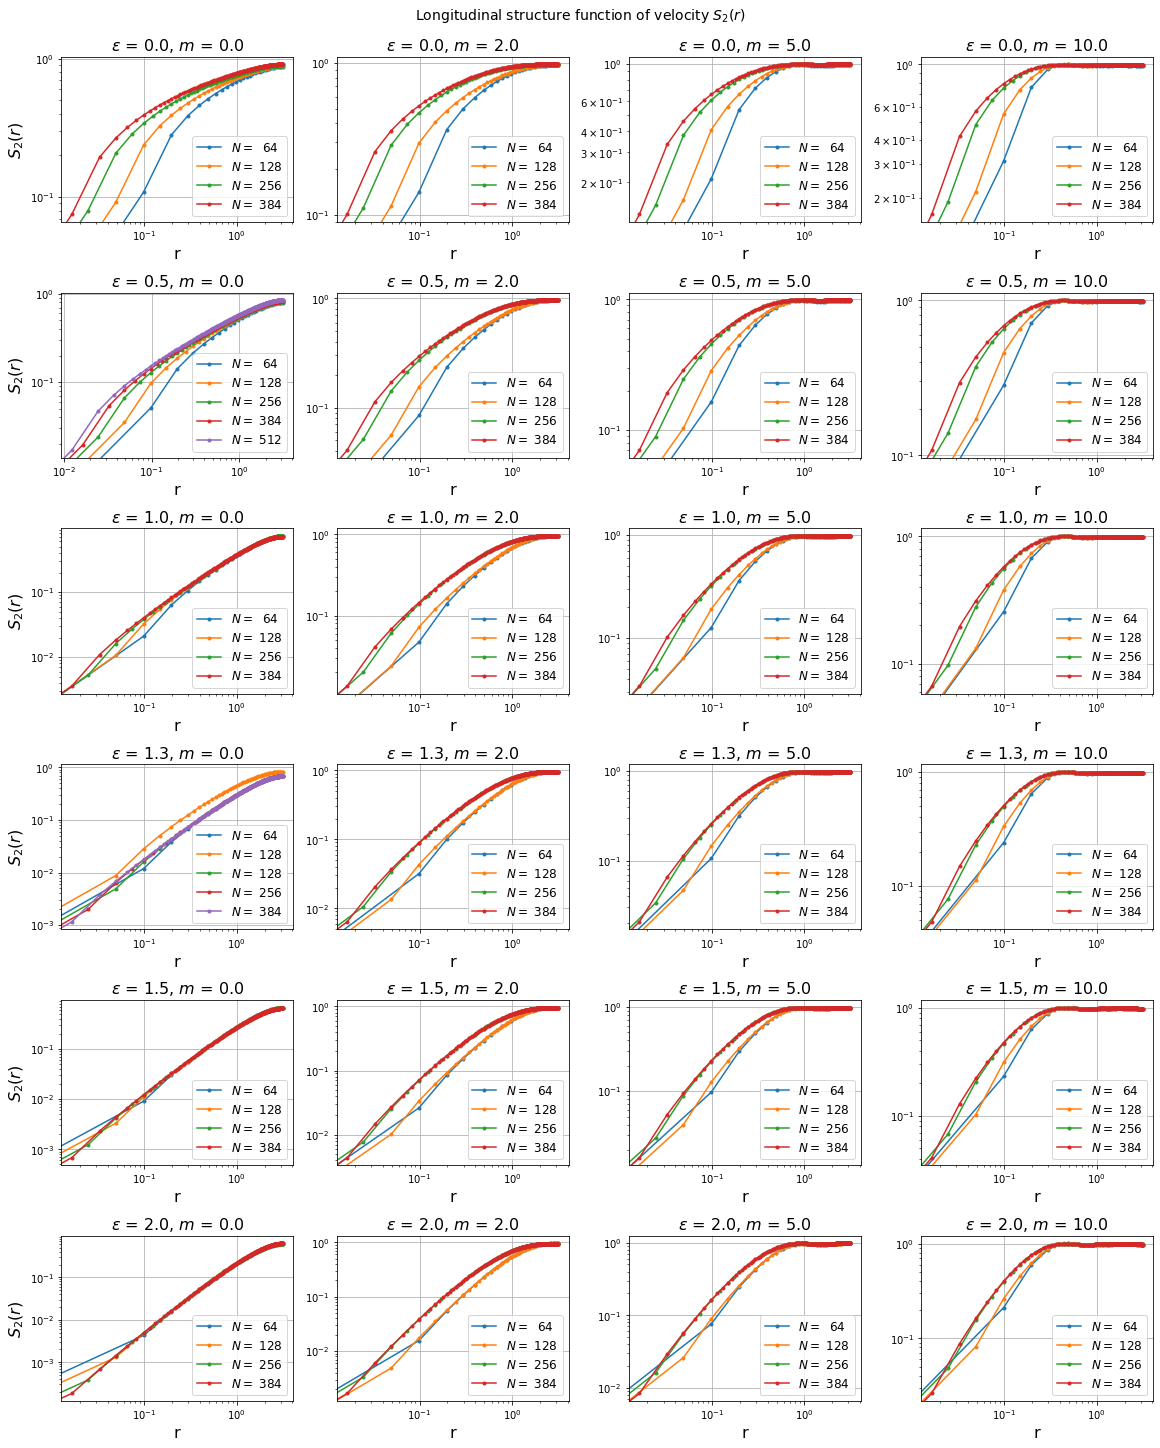

In [16]:
fig, ax = plt.subplots(nrows=6, ncols=4, constrained_layout=True,figsize=(16,20), squeeze=False)
title = fig.suptitle(r'Longitudinal structure function of velocity $S_2(r)$', size=14)
for i in range(len(simulations)) :
    s = simulations[i]
    row, col = get_col_row(s)
    ax[row,col].plot(s['correlations']['X']['r'], (3.0-s['correlations']['X']['XX']-s['correlations']['Y']['YY']-s['correlations']['Z']['ZZ'])/3.0, \
                     '.-', label=r'$N =$ %3d' % s['N'])
    ax[row,col].set(xlabel='r', title=r'$\epsilon$ = %1.1f, $m$ = %1.1f' % (s['eps'], s['m'])); 
    ax[row,col].set(xscale='log', yscale='log')
    ax[row,col].grid(True)
    if (col==0) : ax[row,col].set(ylabel=r'$S_2(r)$')
    ax[row,col].legend(loc='best')
    plt.rc('legend', fontsize=12) 
# pp = PdfPages('Images/Scalar/vel_long_str_fun.pdf')
# pp.savefig(bbox_extra_artists=(title,), bbox_inches='tight')
# pp.close()
#plt.show()

## Compensated longitudinal velocity structure function

/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in reciprocal
  


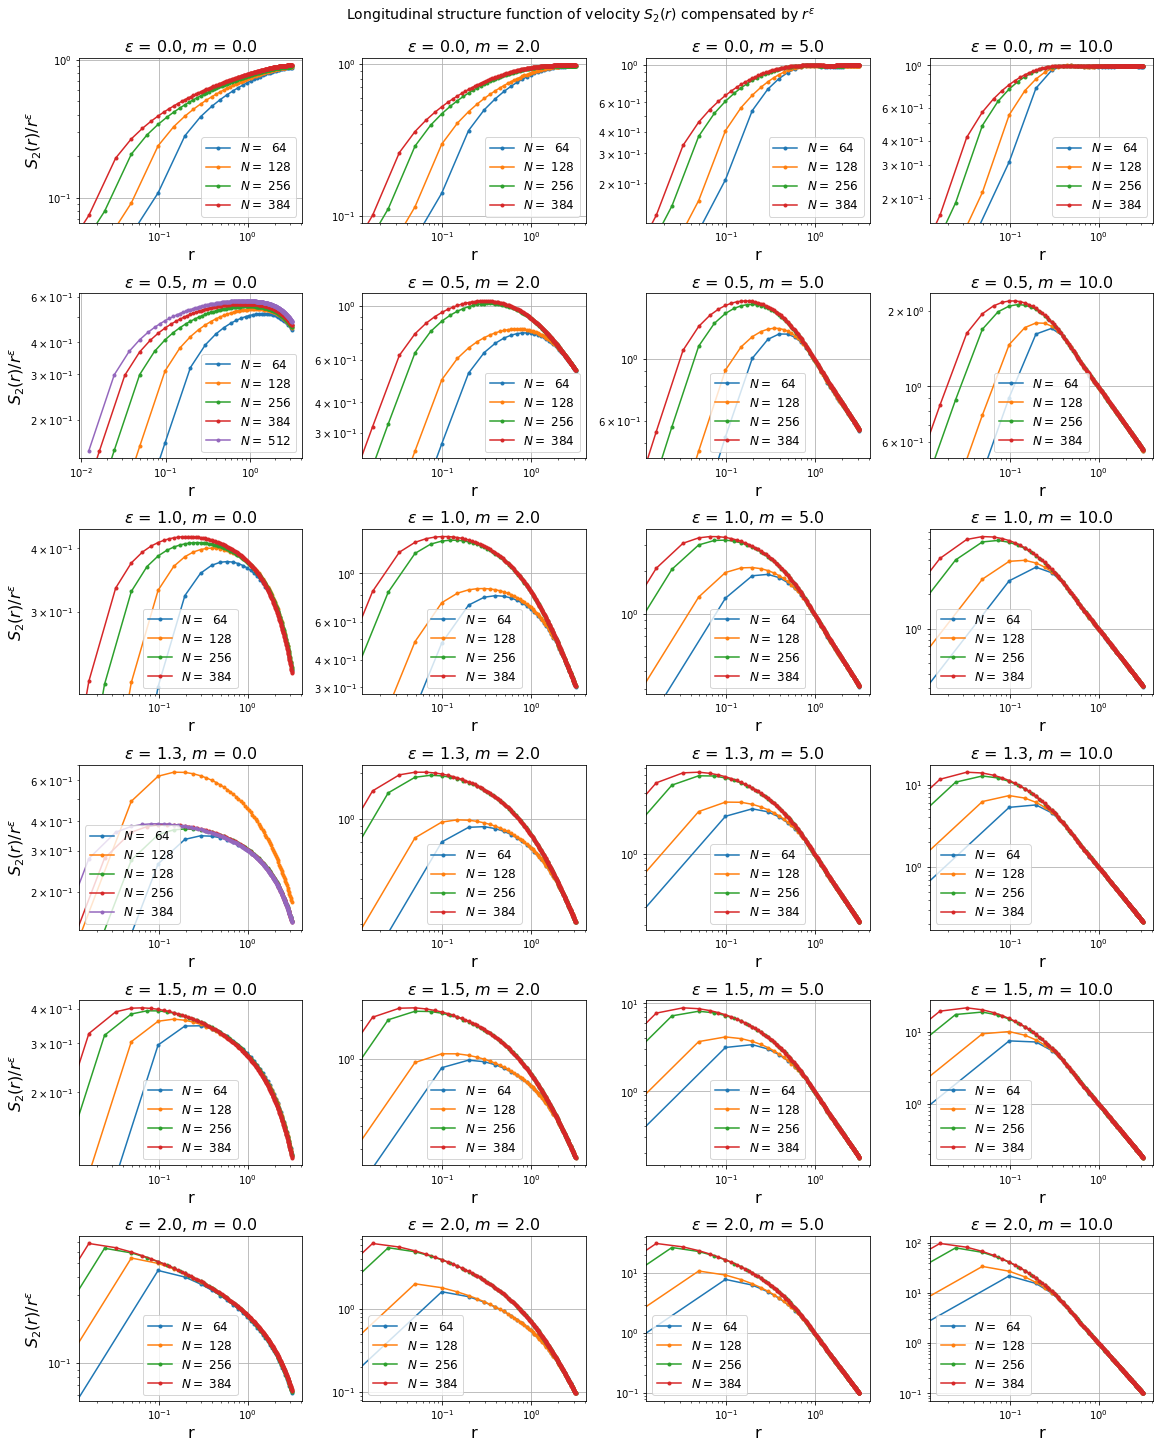

In [17]:
fig, ax = plt.subplots(nrows=6, ncols=4, constrained_layout=True,figsize=(16,20), squeeze=False)
fig.suptitle(r'Longitudinal structure function of velocity $S_2(r)$ compensated by $r^\epsilon$', size=14)
for i in range(len(simulations)) :
    s = simulations[i]
    row, col = get_col_row(s)
    compensation = (s['correlations']['X']['r'])**(-s['eps'])
    ax[row,col].plot(s['correlations']['X']['r'], (3.0-s['correlations']['X']['XX']-s['correlations']['Y']['YY']-s['correlations']['Z']['ZZ'])/3.0*compensation, \
                     '.-', label=r'$N =$ %3d' % s['N'])
    ax[row,col].set(xlabel='r', title=r'$\epsilon$ = %1.1f, $m$ = %1.1f' % (s['eps'], s['m'])); ax[row,col].grid(True)
    ax[row,col].set(xscale='log', yscale='log')
    if (col==0) : ax[row,col].set(ylabel=r'$S_2(r)/r^\epsilon$')
    ax[row,col].legend(loc='best')
# pp = PdfPages('Images/Scalar/vel_long_str_fun_compensated.pdf')
# pp.savefig(bbox_extra_artists=(title,), bbox_inches='tight')
# pp.close()
#plt.show()

/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


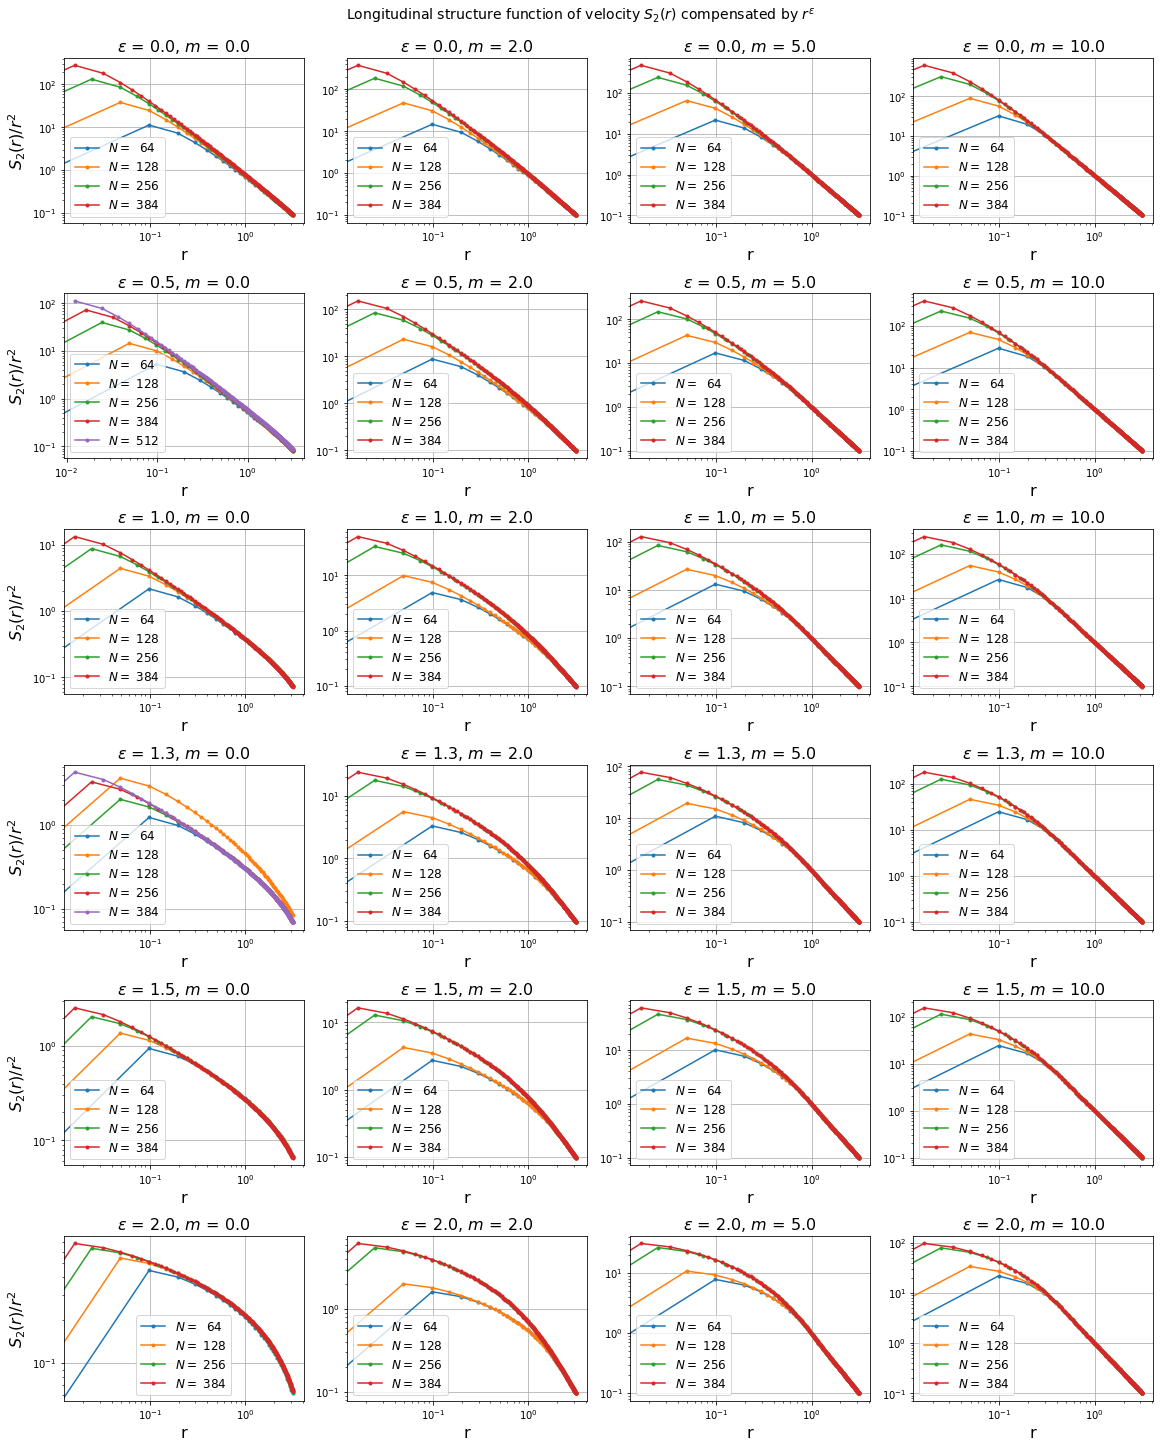

In [18]:
fig, ax = plt.subplots(nrows=6, ncols=4, constrained_layout=True,figsize=(16,20), squeeze=False)
fig.suptitle(r'Longitudinal structure function of velocity $S_2(r)$ compensated by $r^\epsilon$', size=14)
for i in range(len(simulations)) :
    s = simulations[i]
    row, col = get_col_row(s)
    compensation = (s['correlations']['X']['r'])**(-2)
    ax[row,col].plot(s['correlations']['X']['r'], (3.0-s['correlations']['X']['XX']-s['correlations']['Y']['YY']-s['correlations']['Z']['ZZ'])/3.0*compensation, \
                     '.-', label=r'$N =$ %3d' % s['N'])
    ax[row,col].set(xlabel='r', title=r'$\epsilon$ = %1.1f, $m$ = %1.1f' % (s['eps'], s['m'])); ax[row,col].grid(True)
    ax[row,col].set(xscale='log', yscale='log')
    if (col==0) : ax[row,col].set(ylabel=r'$S_2(r)/r^2$')
    ax[row,col].legend(loc='best')
# pp = PdfPages('Images/Scalar/vel_long_str_fun_compensated.pdf')
# pp.savefig(bbox_extra_artists=(title,), bbox_inches='tight')
# pp.close()
#plt.show()

## Transversal correlations

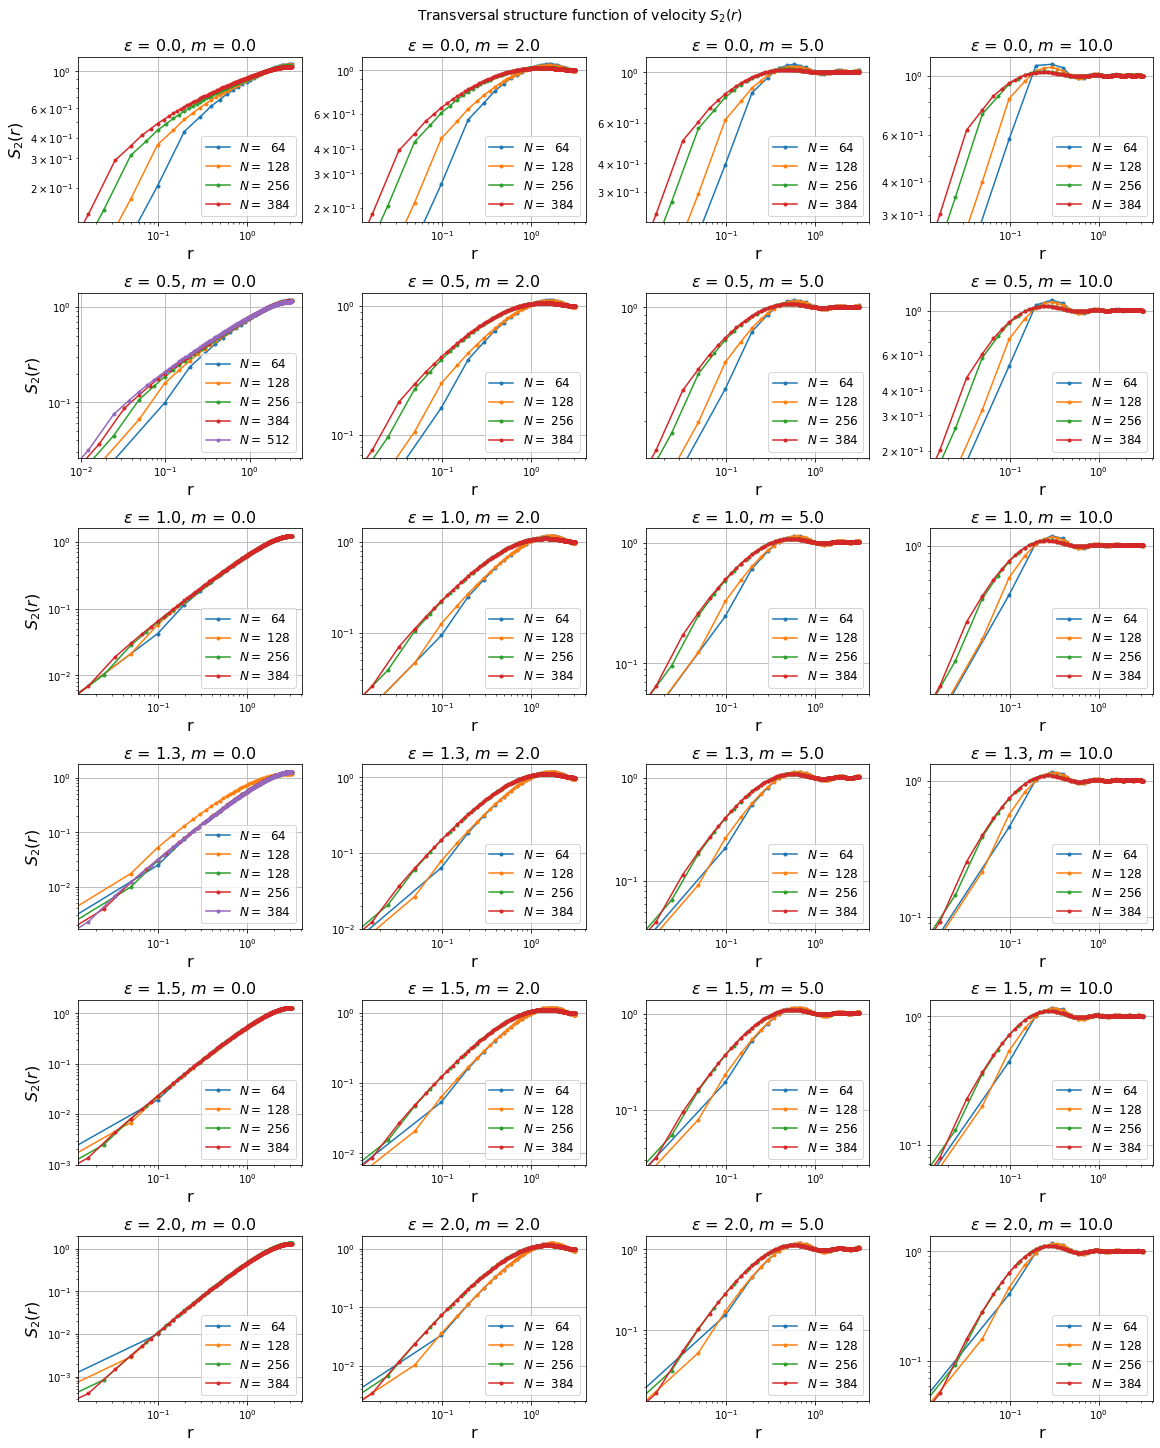

In [19]:
fig, ax = plt.subplots(nrows=6, ncols=4, constrained_layout=True,figsize=(16,20), squeeze=False)
title = fig.suptitle(r'Transversal structure function of velocity $S_2(r)$', size=14)
for i in range(len(simulations)) :
    s = simulations[i]
    row, col = get_col_row(s)
    ax[row,col].plot(s['correlations']['X']['r'], (6.0-s['correlations']['X']['YY']-s['correlations']['X']['ZZ']-s['correlations']['Y']['XX']-\
                                                  s['correlations']['Y']['ZZ']-s['correlations']['Z']['XX']-s['correlations']['Z']['YY'])/6.0, \
                     '.-', label=r'$N =$ %3d' % s['N'])
    ax[row,col].set(xlabel='r', title=r'$\epsilon$ = %1.1f, $m$ = %1.1f' % (s['eps'], s['m'])); 
    ax[row,col].set(xscale='log', yscale='log')
    ax[row,col].grid(True)
    if (col==0) : ax[row,col].set(ylabel=r'$S_2(r)$')
    ax[row,col].legend(loc='best')
    plt.rc('legend', fontsize=12) 
# pp = PdfPages('Images/Scalar/vel_trans_str_fun.pdf')
# pp.savefig(bbox_extra_artists=(title,), bbox_inches='tight')
# pp.close()
plt.show()

## Compensated transversal correlations

/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in reciprocal
  


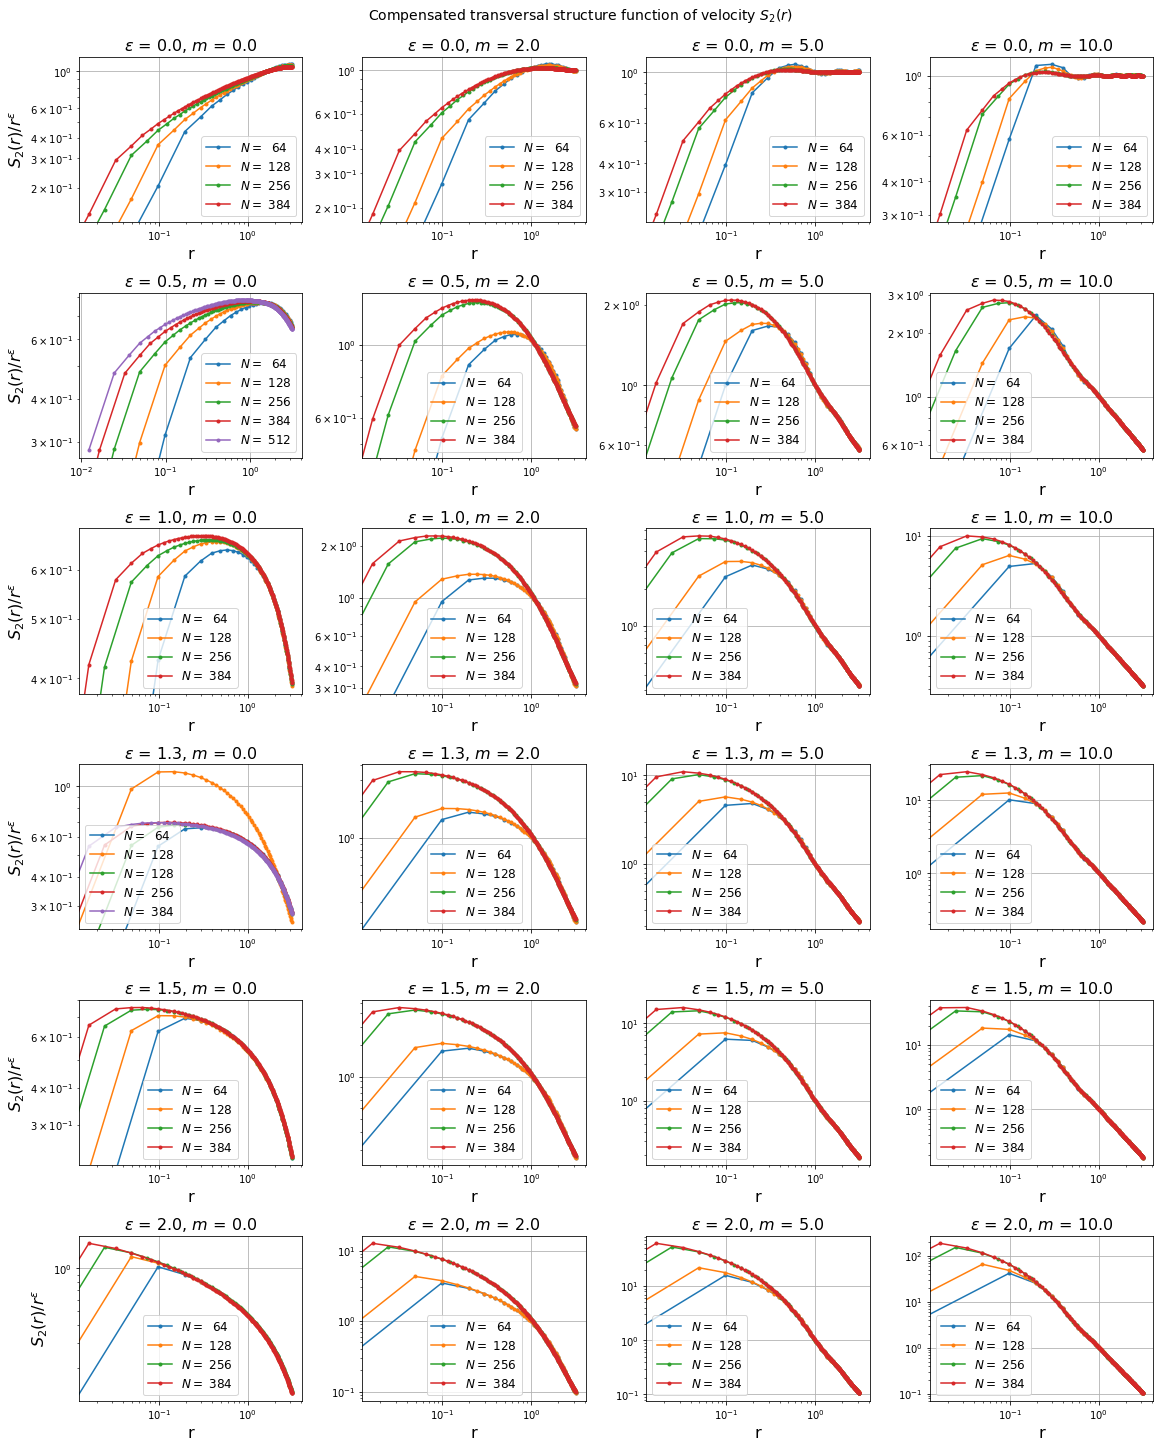

In [20]:
fig, ax = plt.subplots(nrows=6, ncols=4, constrained_layout=True,figsize=(16,20), squeeze=False)
title = fig.suptitle(r'Compensated transversal structure function of velocity $S_2(r)$', size=14)
for i in range(len(simulations)) :
    s = simulations[i]
    row, col = get_col_row(s)
    compensation = (s['correlations']['X']['r'])**(-s['eps'])
    ax[row,col].plot(s['correlations']['X']['r'], (6.0-s['correlations']['X']['YY']-s['correlations']['X']['ZZ']-s['correlations']['Y']['XX']-\
                                                  s['correlations']['Y']['ZZ']-s['correlations']['Z']['XX']-s['correlations']['Z']['YY'])/6.0*compensation, \
                     '.-', label=r'$N =$ %3d' % s['N'])
    ax[row,col].set(xlabel='r', title=r'$\epsilon$ = %1.1f, $m$ = %1.1f' % (s['eps'], s['m'])); 
    ax[row,col].set(xscale='log', yscale='log')
    ax[row,col].grid(True)
    if (col==0) : ax[row,col].set(ylabel=r'$S_2(r)/r^\epsilon$')
    ax[row,col].legend(loc='best')
    plt.rc('legend', fontsize=12) 
# pp = PdfPages('Images/Scalar/vel_trans_str_fun_compensated.pdf')
# pp.savefig(bbox_extra_artists=(title,), bbox_inches='tight')
# pp.close()
plt.show()

## Off-diagonal structure functions

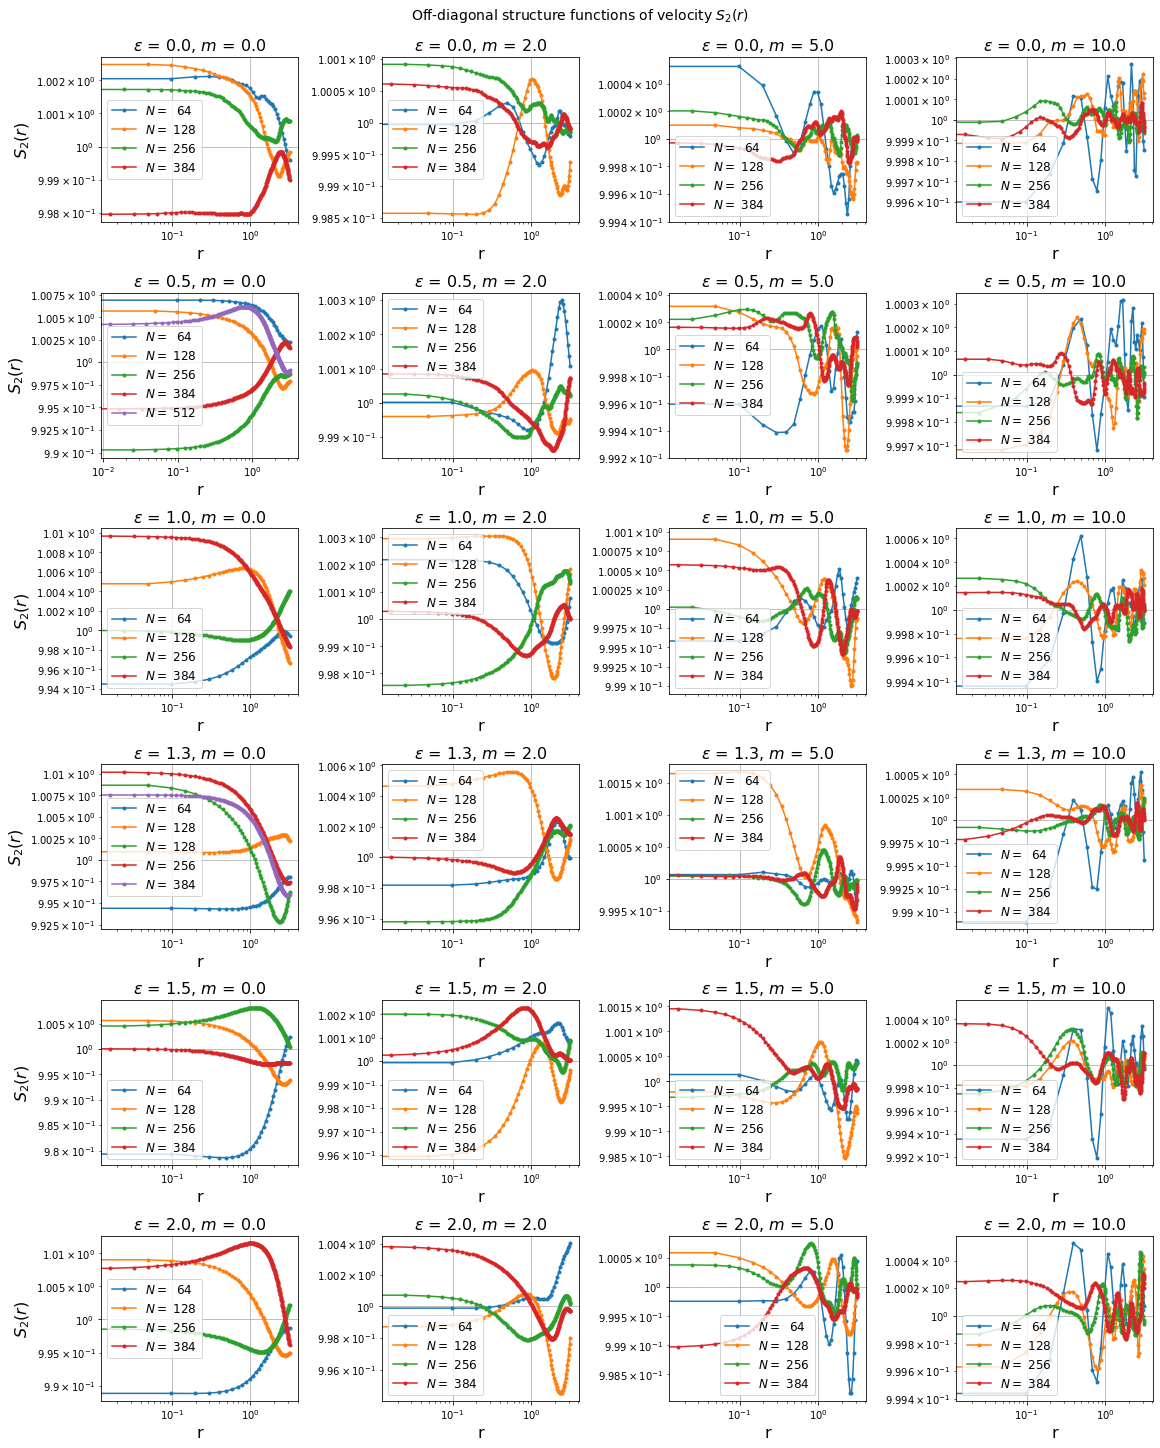

In [21]:
fig, ax = plt.subplots(nrows=6, ncols=4, constrained_layout=True,figsize=(16,20), squeeze=False)
fig.suptitle(r'Off-diagonal structure functions of velocity $S_2(r)$', size=14)
for i in range(len(simulations)) :
    s = simulations[i]
    row, col = get_col_row(s)
    ax[row,col].plot(s['correlations']['X']['r'], (9.0-s['correlations']['X']['XY']-s['correlations']['X']['XZ']-s['correlations']['X']['YZ']-\
                                                  s['correlations']['Y']['XY']-s['correlations']['Y']['XZ']-s['correlations']['Y']['YZ']-\
                                                  s['correlations']['Z']['XY']-s['correlations']['Z']['XZ']-s['correlations']['Z']['YZ'])/9.0, \
                     '.-', label=r'$N =$ %3d' % s['N'])
    ax[row,col].set(xlabel='r', title=r'$\epsilon$ = %1.1f, $m$ = %1.1f' % (s['eps'], s['m'])); 
    ax[row,col].set(xscale='log', yscale='log')
    ax[row,col].grid(True)
    if (col==0) : ax[row,col].set(ylabel=r'$S_2(r)$')
    ax[row,col].legend(loc='best')
    plt.rc('legend', fontsize=12) 
# pp = PdfPages('Images/Scalar/vel_offd_str_fun_compensated.pdf')
# pp.savefig(bbox_extra_artists=(title,), bbox_inches='tight')
# pp.close()
plt.show()